In [1]:
#importation des  bibliothèque
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import math 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.ensemble import AdaBoostClassifier

# Extraction de données

In [2]:
data_bank = pd.read_csv("C:/Users/iheb/Desktop/projet machine learning/Bank Marketing Data Set/bank-additional-full.csv",sep = ';')
data_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data_bank.shape

(41188, 21)

In [6]:
# vérifier les colonne
data_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# vérifier la structure de data_bank
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Vérifiez s’il y a des valeurs null 
data_bank.isnull().values.any() 

False

In [8]:
data_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Vérifiez s’il y a des lignes dupliquées
data_bank.drop_duplicates (subset = None, keep = 'first', inplace = False)
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# corrélation à partir des données
data_bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


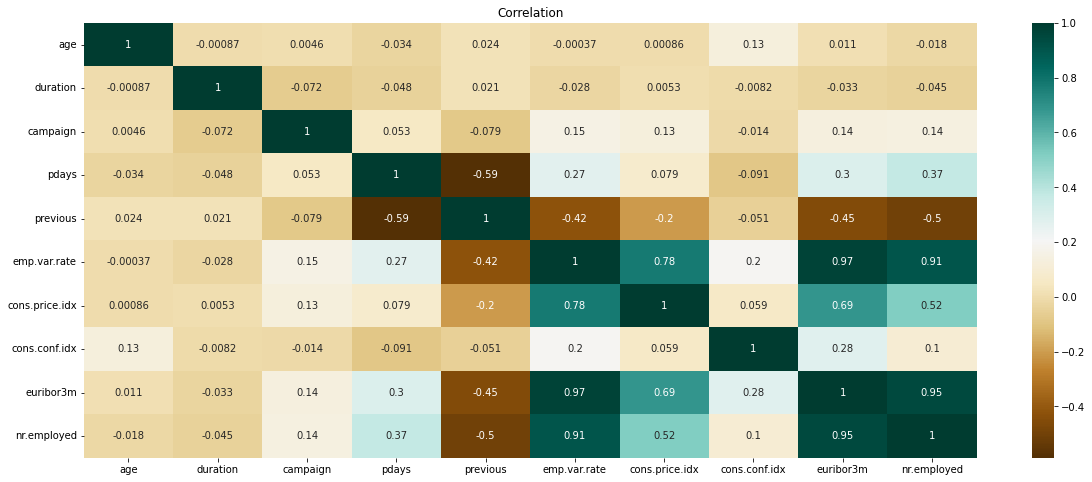

In [12]:
#visualiser la corrélation avec heatmap
plt.figure(figsize = (20,8))
sns.heatmap(data_bank.corr(), annot = True, cmap = 'BrBG')
plt.title("Correlation")
plt.show()

# Visualisation des données

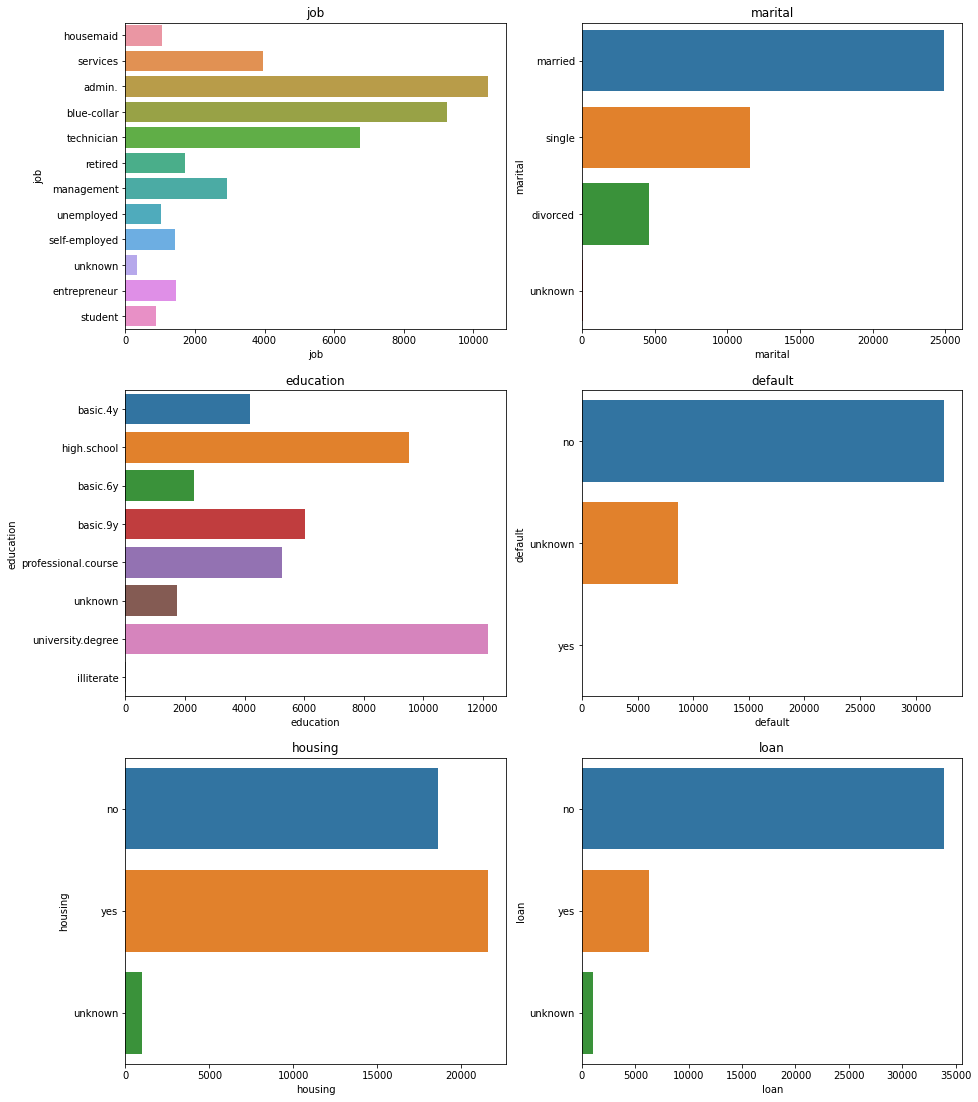

In [14]:
plt.figure(figsize=(15,80)) 
data = data_bank.copy()
liste = data[["job","marital","education","default","housing","loan"]]
liste.head()
number = 1
for i in liste:
    plt.subplot(12,2,number)
    sns.countplot(data=liste,y=i)
    plt.title(i)
    plt.xlabel(i)
    number = number+1


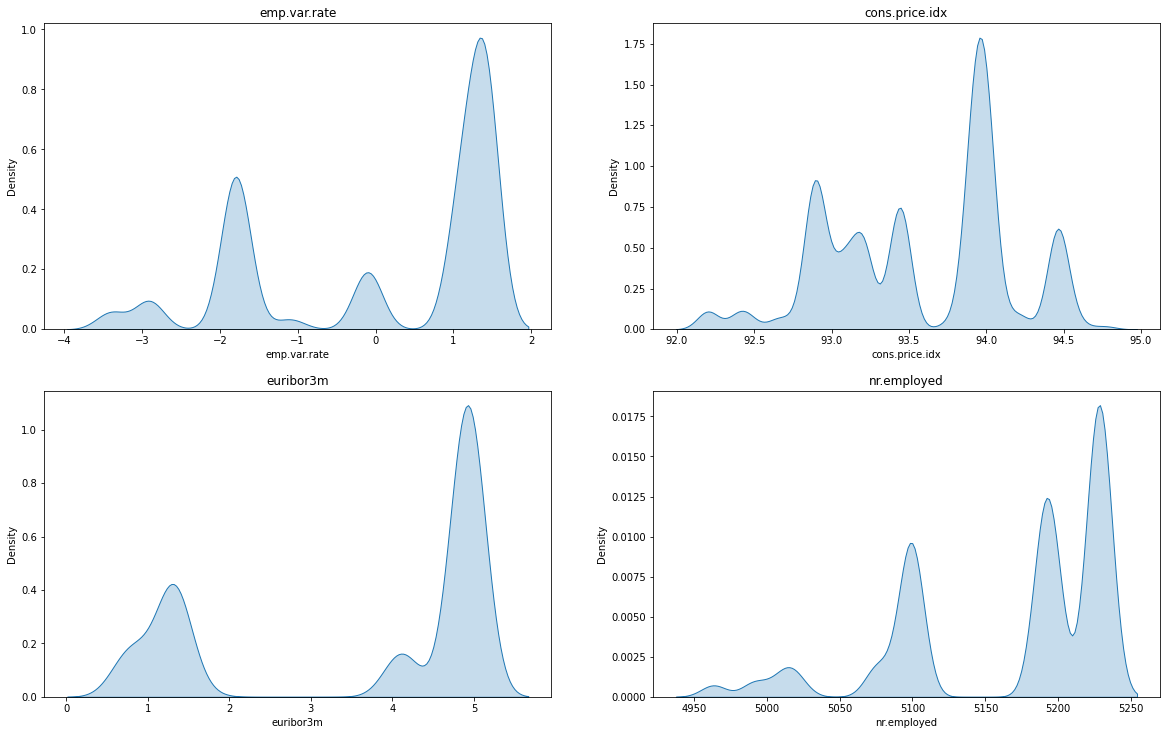

In [5]:
listE =data_bank[['emp.var.rate','cons.price.idx','euribor3m', 'nr.employed']]
number = 1
plt.figure(figsize=(20,80))
for i in listE:
    plt.subplot(12,2,number)
    sns.kdeplot(listE[i], shade=True)
    plt.title(i)
    plt.xlabel(i)
    number = number+1    

<AxesSubplot:xlabel='duration'>

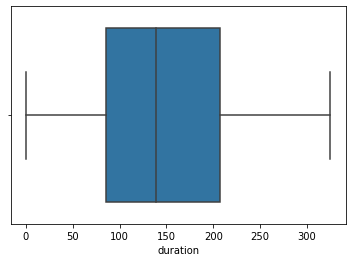

In [4]:
# IQR 
Q1 = np.percentile(data_bank['duration'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(data_bank['duration'], 75,interpolation = 'midpoint')

IQR = Q3 - Q1
a = data_bank[data_bank['duration']>(1.5*IQR)] #None
b = data_bank[data_bank['duration']<=(1.5*IQR)]
sns.boxplot(x="duration",data=b)

Text(0.5, 1.0, "dernier contact mois de l'année ")

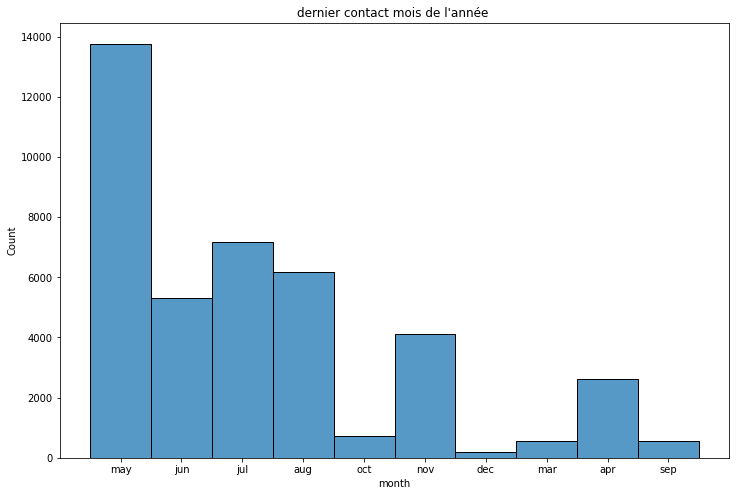

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(data=data_bank,x='month') 
plt.title("dernier contact mois de l'année ")

c:\users\iheb\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

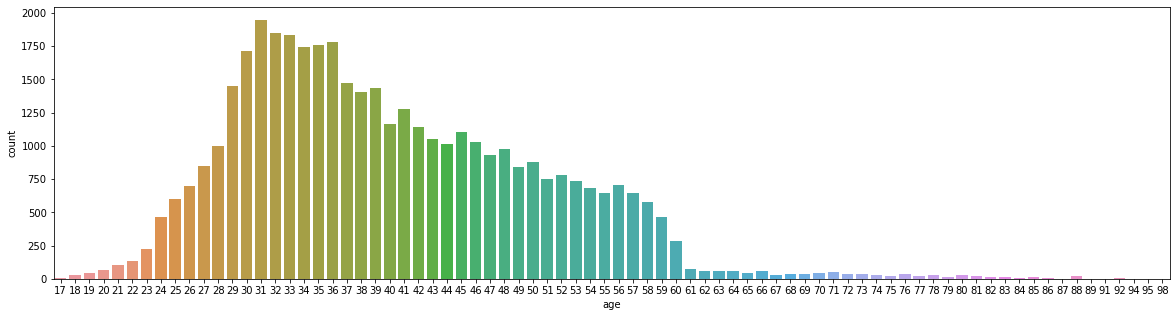

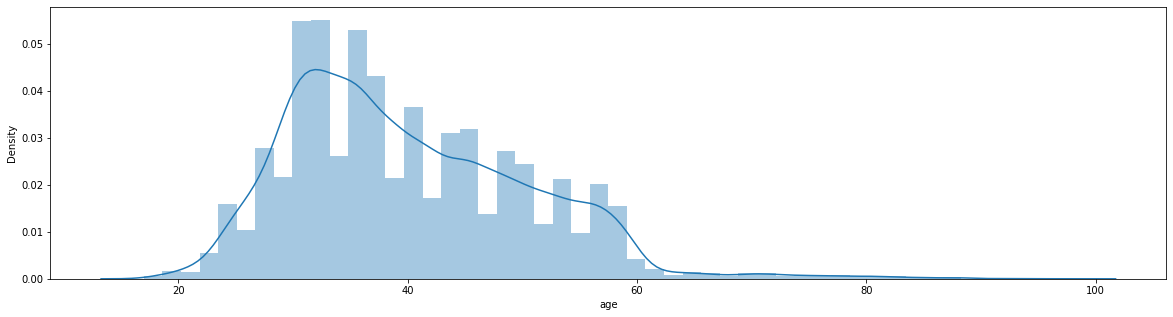

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(data=data_bank,x=data_bank['age'])
plt.figure(figsize=(20,5))
sns.distplot(data_bank['age'])

       Nous pouvons en déduire que la plupart des clients appartiennent à la tranche d'âge entre 20 et 60 ans.

In [15]:
pd.crosstab(data_bank['age'],data_bank['y']) # y c'est le terme deposit 

y,no,yes
age,,
17,3,2
18,16,12
19,22,20
20,42,23
21,73,29
...,...,...
91,2,0
92,1,3
94,1,0


Text(0.5, 1.0, 'age vs terme deposit')

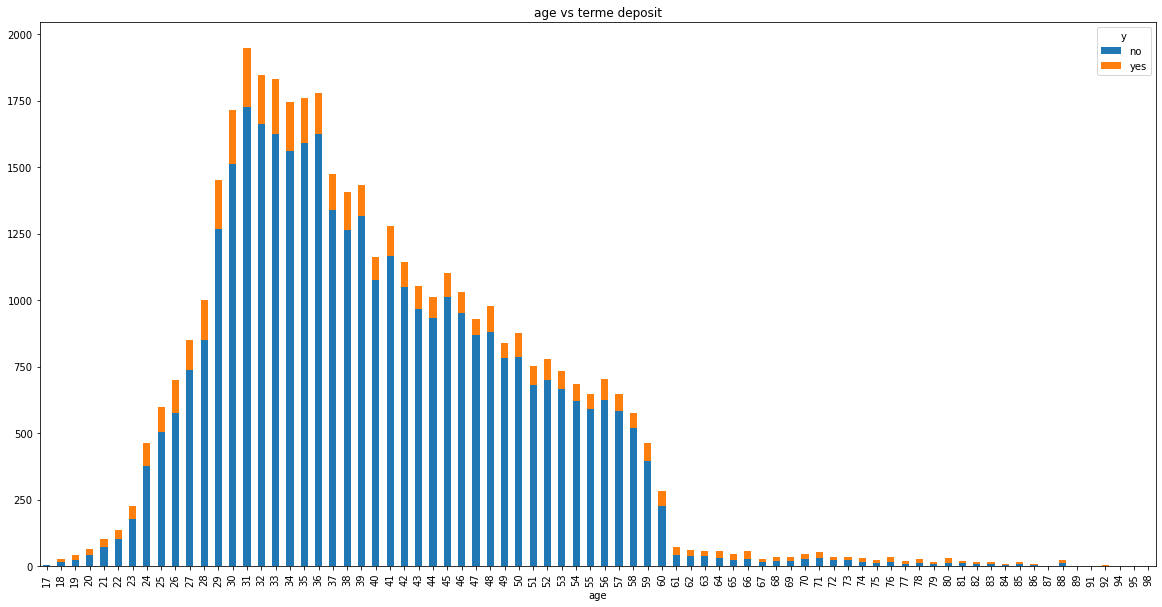

In [16]:
age = pd.crosstab(data_bank['age'],data_bank['y'])
age.plot.bar(stacked=True, figsize=(20,10));
plt.title('age vs terme deposit')

In [17]:
 pd.crosstab(data_bank['job'],data_bank['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


Text(0.5, 1.0, 'job vs terme deposit')

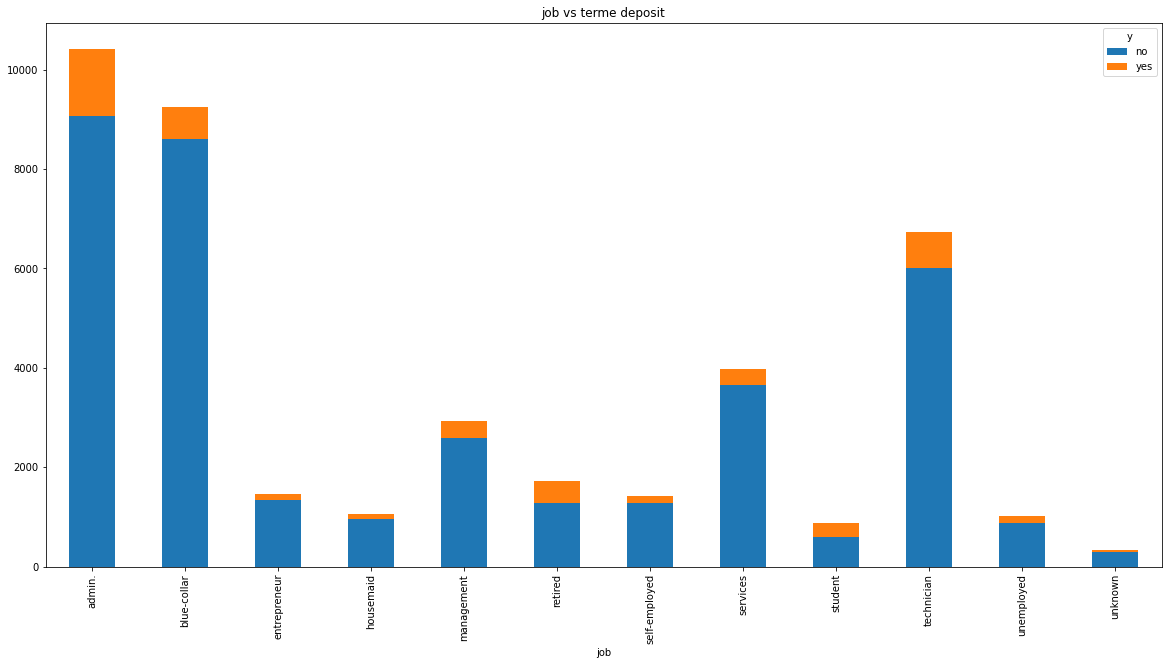

In [18]:
job = pd.crosstab(data_bank['job'],data_bank['y'])
job.plot.bar(stacked=True, figsize=(20,10));
plt.title('job vs terme deposit')

In [3]:
# Maintenant, pour déduire les valeurs manquantes dans 'job' et 'éducation', j'ai utiliser le tableau "crosstab"

pd.crosstab(data_bank['job'],data_bank['education'])


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [7]:
# voir quelle est le job de client a un age > 60 
data_bank['job'][data_bank['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [3]:
# eliminer les valuer unknown dans job 
data_bank.loc[(data_bank['age']>60) & (data_bank['job'] == 'unknown'),'job'] = 'retired'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'basic.4y' ),'job'] = 'blue-collar'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'basic.6y' ),'job'] = 'blue-collar'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'basic.9y' ),'job'] = 'blue-collar'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'high.school' ),'job'] = 'admin.'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'professional.course' ),'job'] = 'technician'
data_bank.loc[(data_bank['job'] == 'unknown') & (data_bank['education'] == 'university.degree' ),'job'] = 'admin.'

# eliminer les valuer unknown dans education 
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'admin.' ),'education']= 'university.degree'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'blue-collar' ),'education']= 'basic.9y'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'entrepreneur' ),'education']= 'university.degree'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'housemaid' ),'education']= 'basic.4y'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'management' ),'education']= 'university.degree'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'self-employed' ),'education']= 'university.degree'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'retired' ),'education']= 'basic.4y'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'services' ),'education']= 'high.school'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'student' ),'education']= 'high.school'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'technician' ),'education']= 'professional.course'
data_bank.loc[(data_bank['education'] == 'unknown')& (data_bank['job'] == 'unemployed' ),'education']= 'university.degree'


In [4]:
pd.crosstab(data_bank['job'],data_bank['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3366,1,363,6046,0
blue-collar,2366,1448,4108,878,8,453,94,0
entrepreneur,137,71,210,234,2,135,667,0
housemaid,516,77,94,174,1,59,139,0
management,100,85,166,298,0,89,2186,0
retired,713,75,145,276,3,243,286,0
self-employed,93,25,220,118,3,168,794,0
services,132,226,388,2832,0,218,173,0
student,26,13,99,524,0,43,170,0


     Comme nous pouvons le constater, nous avons pu réduire les inconnues et améliorer notre ensemble de données.

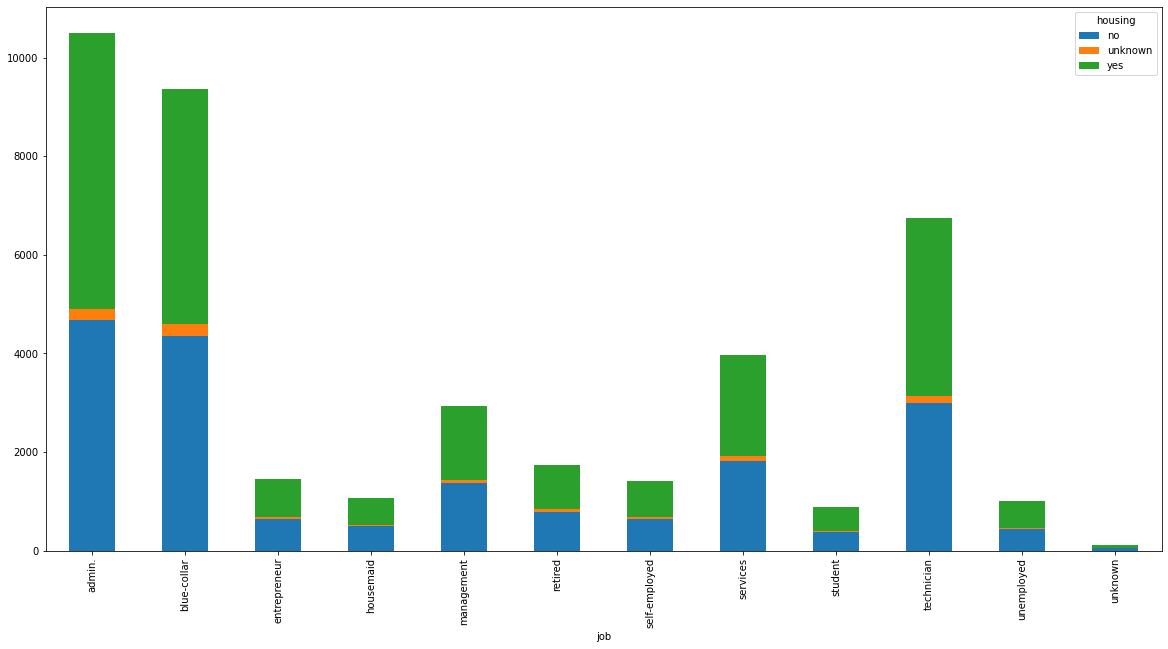

In [5]:
relation_job_housing = pd.crosstab(data_bank['job'],data_bank['housing'])
relation_job_housing.plot.bar(stacked=True, figsize=(20,10));

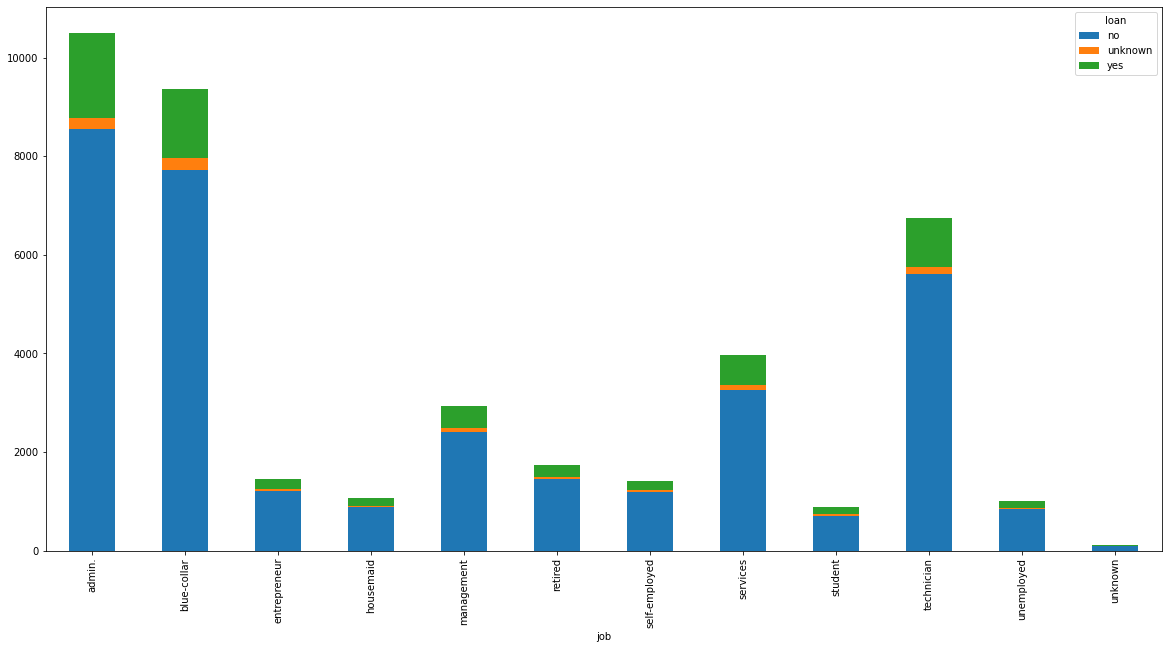

In [6]:
relation_job_loan = pd.crosstab(data_bank['job'],data_bank['loan'])
relation_job_loan.plot.bar(stacked=True, figsize=(20,10));

In [26]:
data_bank['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [27]:
data_bank['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [7]:
def job_housing(df,jobhousing):
    #Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

def job_loan(df,jobloan):
    #Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [8]:
data_bank=job_housing(data_bank,relation_job_housing)
data_bank = job_loan(data_bank,relation_job_loan)

Text(0.5, 1.0, 'job vs housing')

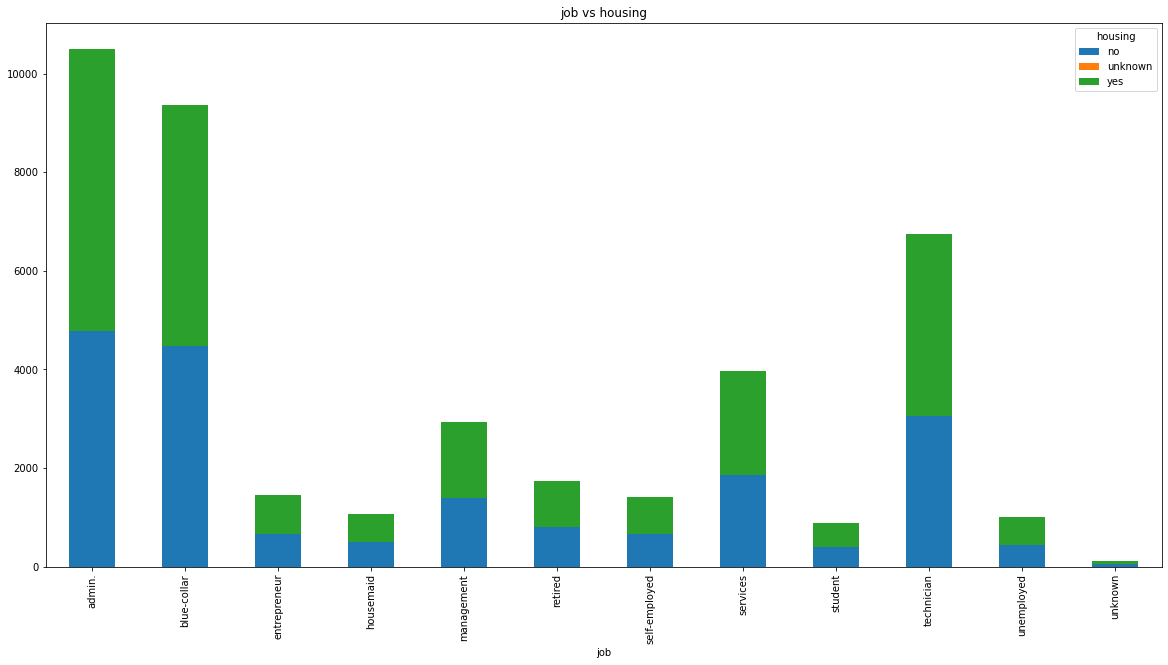

In [9]:
relation_job_housing = pd.crosstab(data_bank['job'],data_bank['housing'])
relation_job_housing.plot.bar(stacked=True, figsize=(20,10));
plt.title('job vs housing')

Text(0.5, 1.0, 'job vs loan')

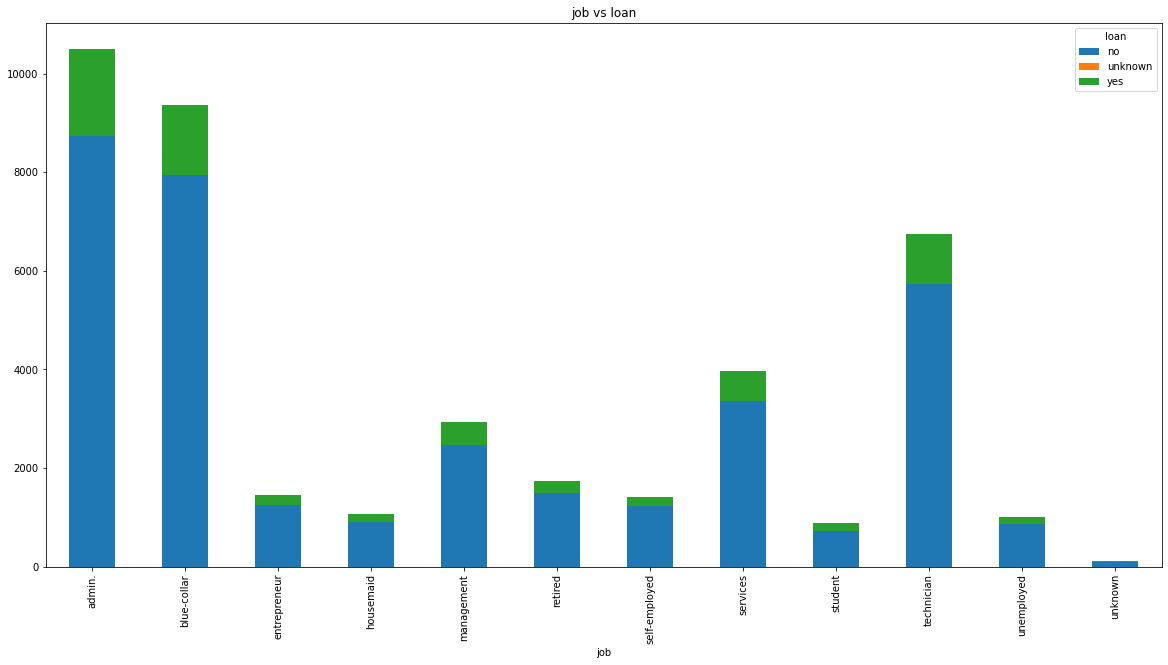

In [10]:
relation_job_loan = pd.crosstab(data_bank['job'],data_bank['loan'])
relation_job_loan.plot.bar(stacked=True, figsize=(20,10));
plt.title('job vs loan')

In [11]:
# tronsformer les donnée 
for i in data_bank.columns.tolist():
    data_bank[i] = data_bank[i].astype('category').cat.codes

data_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


# separation des donnée

In [12]:
X = data_bank.drop('y', axis = 1)
Y = data_bank['y']
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,5,25,0,171,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,25,0,171,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,25,0,171,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,5,25,0,171,0


In [13]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int8

# données d'entrainement et données de test 

In [14]:
# données d'entrainement ,  données de test 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=30)

In [15]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(41188, 20)
(37069, 20)
(4119, 20)


#  Sélection du modèle 

Dans cette partie on travaille par  5 modele different :  Random Forest Classifier,Logistic Regression,Decision Tree Classifier,svm,KNeighborsClassifier (KNN)


# Random Forest Classifier

In [23]:
modele_Rf = RandomForestClassifier()
modele_Rf.fit(x_train,y_train)

RandomForestClassifier()

predection sur les données données de test

In [24]:
#predection sur les données données de test 
test_data_predection_RF = modele_Rf.predict(x_test)
print(test_data_predection_RF)

[0 0 0 ... 0 1 0]


evaluation de modele

In [25]:
score1 = metrics.accuracy_score(y_test,test_data_predection_RF)
print(score1)
print("Accuracy: %.2f%%" % (score1 * 100.0))

0.9142995872784656
Accuracy: 91.43%


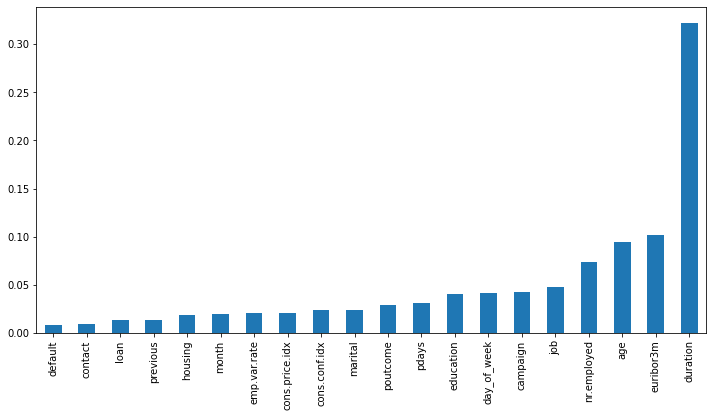

In [26]:
# feature importances
plt.figure(figsize=(12,6))
feature_importances = pd.Series(modele_Rf.feature_importances_, index=X.columns).sort_values()
feature_importances.plot(kind='bar')
plt.show()

# Logistic Regression

In [184]:
modele_LR = LogisticRegression()
modele_LR.fit(x_train,y_train)

c:\users\iheb\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
test_data_predection_LR = modele_LR.predict(x_test)
print(test_data_predection_LR)

[0 0 0 ... 0 1 0]


evaluation de modele

In [187]:
score2=accuracy_score(y_test,test_data_predection_LR)
print(score2)
print("Accuracy: %.2f%%" % (score2 * 100.0))

0.9113862588006798
Accuracy: 91.14%


# SVM

In [16]:
modele_SVM = svm.SVC()
modele_SVM.fit(x_train,y_train)

SVC()

In [17]:
predection_SVM = modele_SVM.predict(x_test)
print(predection_SVM)

[0 0 0 ... 0 1 0]


evaluation de modele

In [18]:
score4=accuracy_score(y_test,predection_SVM)
print(score4)
print("Accuracy: %.2f%%" % (score4 * 100.0))

0.9116290361738286
Accuracy: 91.16%


# KNeighborsClassifier  (KNN)

In [196]:
modele_knn = KNeighborsClassifier()
modele_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [197]:
predection_knn = modele_knn.predict(x_test)
print(predection_knn)

[0 0 0 ... 0 1 0]


evaluation de modele 

In [198]:
score5 =accuracy_score(y_test,predection_knn)
print(score5)
print("Accuracy: %.2f%%" % (score5 * 100.0))

0.9104151493080845
Accuracy: 91.04%


# AdaBoost Classifier

In [244]:
modele_Adaboost = AdaBoostClassifier()
modele_Adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [245]:
predection_Adaboost = modele_Adaboost.predict(x_test)
print(predection_Adaboost)

[0 0 0 ... 0 1 0]


In [247]:
score6 =accuracy_score(y_test,predection_Adaboost)
print(score6)
print("Accuracy: %.2f%%" % (score6 * 100.0))

0.9099295945617868
Accuracy: 90.99%


# on applique cross validation score et  GridSearchCV sur chaque modele       
 

on utiliser cross validation score et GridSearchCV sur KNN

In [199]:
for i in range(1,15):
    print(i,":",cross_val_score(KNeighborsClassifier(n_neighbors = i), x_train, y_train, cv=5,
    scoring="accuracy").mean())

1 : 0.8915536835510608
2 : 0.8993498724217194
3 : 0.9008336429222265
4 : 0.9035312820881201
5 : 0.9045293974077356
6 : 0.9046643101156766
7 : 0.9059592304815529
8 : 0.9058513883792756
9 : 0.9067415269531931
10 : 0.9061211191808614
11 : 0.9081443367284946
12 : 0.9067415342312157
13 : 0.908899697237892
14 : 0.9083871461238834


In [200]:
# 
params = {
'n_neighbors': [7, 9, 10, 11, 13,14],
'metric' : ['euclidean', 'manhattan']
}

meilleurs_hyperparamètres_KNN = GridSearchCV(modele_knn, params)
meilleurs_hyperparamètres_KNN.fit(x_train,y_train)
meilleurs_hyperparamètres_KNN.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [202]:
knn = KNeighborsClassifier(n_neighbors = 11,metric='manhattan')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [203]:
knn_predection = knn.predict(x_test)
print(knn_predection)

[0 0 0 ... 0 1 0]


In [205]:
score_knn =accuracy_score(y_test,knn_predection)
print(score_knn)
print("Accuracy: %.2f%%" % (score_knn * 100.0))

0.9130857004127215
Accuracy: 91.31%


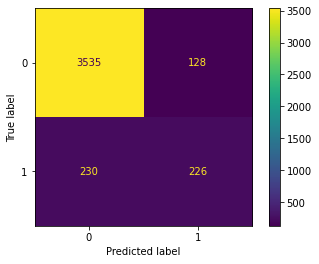

In [209]:
warnings.filterwarnings('ignore')

plot_confusion_matrix(knn, x_test, y_test)
plt.show()

In [211]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3663
           1       0.64      0.50      0.56       456

    accuracy                           0.91      4119
   macro avg       0.79      0.73      0.75      4119
weighted avg       0.91      0.91      0.91      4119



on utiliser cross validation score et GridSearchCV sur Random Forest Classifier

In [212]:
for i in range(1,15):
    print(i,":",cross_val_score(modele_Rf, x_train, y_train, cv=5,
    scoring="accuracy").mean())

1 : 0.9138364492186332
2 : 0.9131080574225805
3 : 0.9146457762668119
4 : 0.9142681378607438
5 : 0.9135127118491415
6 : 0.9136475663329001
7 : 0.9138634179319782
8 : 0.9138364492186334
9 : 0.9130001243450188
10 : 0.9137824608457841
11 : 0.9139983088058508
12 : 0.9134857249407397
13 : 0.9141601501980114
14 : 0.9136206230926351


In [33]:
param_grid = { 
    'n_estimators': [10,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [3,4,7,11,13],
    #'max_leaf_nodes': list(range(2, 100)), 
    #'min_samples_split': [2, 3, 4]
}
meilleurs_hyperparamètres_RandomForest = GridSearchCV(estimator=modele_Rf,param_grid=param_grid,cv=5)
meilleurs_hyperparamètres_RandomForest.fit(x_train,y_train)
meilleurs_hyperparamètres_RandomForest.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [34]:
RandomForest = RandomForestClassifier(n_estimators=200,max_features='auto')
RandomForest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
RandomForest_predection = RandomForest.predict(x_test)
print(RandomForest_predection)

[0 0 0 ... 0 1 0]


In [39]:
score_RandomForest =accuracy_score(y_test,RandomForest_predection)
print(score_RandomForest)
print("Accuracy: %.2f%%" % (score_RandomForest * 100.0))

0.9167273610099539
Accuracy: 91.67%


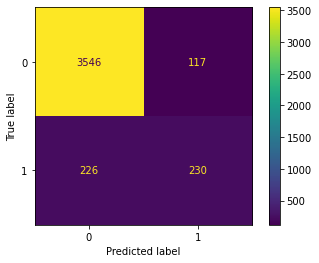

In [40]:
warnings.filterwarnings('ignore')

plot_confusion_matrix(RandomForest, x_test, y_test)
plt.show()

In [41]:
print(classification_report(y_test, RandomForest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3663
           1       0.66      0.50      0.57       456

    accuracy                           0.92      4119
   macro avg       0.80      0.74      0.76      4119
weighted avg       0.91      0.92      0.91      4119



on utiliser cross validation score et GridSearchCV sur Logistic Regression

In [226]:
import warnings
warnings.filterwarnings('ignore')

paramt = {
    'penalty' : ['l1','l2'],
}            
meilleurs_hyperparamètres_LR = GridSearchCV(modele_LR,param_grid = paramt,scoring='accuracy',cv=5)
meilleurs_hyperparamètres_LR.fit(x_train,y_train)
meilleurs_hyperparamètres_LR.best_params_

{'penalty': 'l2'}

In [227]:
LR = LogisticRegression(penalty='l2')
LR.fit(x_train,y_train)

LogisticRegression()

In [228]:
LR_predection = LR.predict(x_test)
print(LR_predection)

[0 0 0 ... 0 1 0]


In [229]:
score_LR =accuracy_score(y_test,LR_predection)
print(score_LR)
print("Accuracy: %.2f%%" % (score_LR * 100.0))

0.9113862588006798
Accuracy: 91.14%


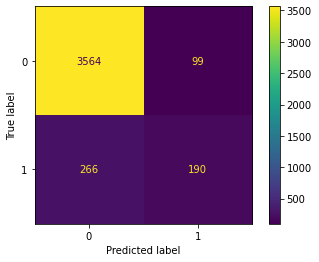

In [230]:
warnings.filterwarnings('ignore')

plot_confusion_matrix(LR, x_test, y_test)
plt.show()

In [231]:
print(classification_report(y_test, LR.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3663
           1       0.66      0.42      0.51       456

    accuracy                           0.91      4119
   macro avg       0.79      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



on utiliser cross validation score et GridSearchCV sur SVM

In [ ]:
param_SVM = {'C': [1, 10],
             'kernel': ['linear','rbf']
              
}          
meilleurs_hyperparamètres_SVM = GridSearchCV(modele_SVM,param_grid = param_SVM,cv=5)
meilleurs_hyperparamètres_SVM.fit(x_train,y_train)
meilleurs_hyperparamètres_SVM.best_params_

In [ ]:
SVM_Md= svm.SVC(C=1,kernel='linear')
SVM_Md.fit(x_train,y_train)

In [22]:
SVM_pred = SVM_Md.predict(x_test)
print(SVM_pred)

[0 0 0 ... 0 1 0]


In [23]:
score_SVM =accuracy_score(y_test,SVM_pred)
print(score_SVM)
print("Accuracy: %.2f%%" % (score_SVM * 100.0))

0.9047477744807122
Accuracy: 90.47%


In [24]:
print(classification_report(y_test, SVM_Md.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     32914
           1       0.65      0.32      0.43      4156

    accuracy                           0.90     37070
   macro avg       0.79      0.65      0.69     37070
weighted avg       0.89      0.90      0.89     37070



on utiliser cross validation score et GridSearchCV sur AdaBoost

In [248]:
param_Adaboost = { 
    'n_estimators': [50,100,200,]
}

meilleurs_hyperparamètres_param_Adaboost = GridSearchCV(modele_Adaboost,param_grid = param_Adaboost,cv=5)
meilleurs_hyperparamètres_param_Adaboost.fit(x_train,y_train)
meilleurs_hyperparamètres_param_Adaboost.best_params_

{'n_estimators': 100}

In [256]:
ADABOOST = AdaBoostClassifier(n_estimators=100)
ADABOOST.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [257]:
ADABOOST_pred = ADABOOST.predict(x_test)
print(ADABOOST_pred)

[0 0 0 ... 0 1 0]


In [258]:
score_ADABOOST =accuracy_score(y_test,ADABOOST_pred)
print(score_ADABOOST)
print("Accuracy: %.2f%%" % (score_ADABOOST * 100.0))

0.9126001456664239
Accuracy: 91.26%


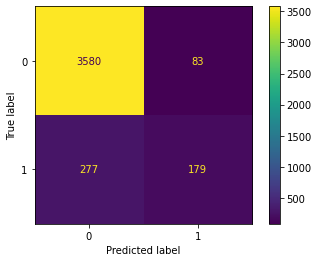

In [259]:
warnings.filterwarnings('ignore')

plot_confusion_matrix(ADABOOST, x_test, y_test)
plt.show()

In [260]:
print(classification_report(y_test, ADABOOST.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3663
           1       0.68      0.39      0.50       456

    accuracy                           0.91      4119
   macro avg       0.81      0.68      0.73      4119
weighted avg       0.90      0.91      0.90      4119

